# Sleep Health & Lifestyle — Analysis Summary

## 1. Project Title
Sleep Health & Lifestyle — Exploratory & Multivariate Analysis

## 2. Dataset
Source: UoM Kaggle — "Sleep Health and Lifestyle Dataset"  
Link: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

## 3. Purpose
1. Explore relationships between sleep and lifestyle/health variables.  
2. Identify strongest predictors of poor sleep (stress, caffeine, BMI, etc.).  
3. Produce visual, statistical, and multivariate analyses to support conclusions.  
4. Provide reproducible code and a short, sharable insights document.

## 4. Methods / Steps performed
1. Data loading & high-level checks (shape, dtypes, missing values).  
2. Cleaning: rename columns, standardize categories, fill/drop missing values.  
3. Univariate analysis: histograms, KDE, boxplots for each variable.  
4. Bivariate analysis: scatter/regression/boxplots for meaningful pairs (Sleep Hours vs Stress, BMI, Caffeine, etc.).   
5. Insights generation: top correlated variables and short textual observations.

In [ ]:
# ===================================================================================================================
#                                              Import Relavent Libraries                                            #
# ===================================================================================================================

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# ===================================================================================================================
#                                                  Data Pre-Processing          s                                    #
# ===================================================================================================================

In [ ]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [68]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [69]:
# Finding Null Values:

In [70]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [71]:
bp_split = df['Blood Pressure'].str.split('/', expand=True)

In [72]:
df['Blood Pressure (Max)'] = bp_split[0].astype(int)
df['Blood Pressure (Min)'] = bp_split[1].astype(int)

In [73]:
df = df.drop('Blood Pressure',axis = 1)

In [74]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [133]:
# ===================================================================================================================
#                                                Creating new CSV file                                              #
# ===================================================================================================================

In [75]:
df.to_csv("Health sleep analysia.csv")

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Blood Pressure (Max)     374 non-null    int64  
 13  Blood Pressure (Min)     374 non-null    int64  
dtypes: float64(1), int64(9), o

In [120]:
df = pd.read_csv("Health sleep analysia.csv")

In [121]:
df = df.drop('Unnamed: 0', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Blood Pressure (Max)     374 non-null    int64  
 13  Blood Pressure (Min)     374 non-null    int64  
dtypes: float64(1), int64(9), o

---

In [ ]:
# ===================================================================================================================
#                                      Seperating Categorical And Numerical Data                                    #
# ===================================================================================================================

1. Numerical Data 

In [134]:
num= df.select_dtypes(include= ['int64','float64'])
num

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Blood Pressure (Max),Blood Pressure (Min)
0,1,27,6.1,6,42,6,77,4200,126,83
1,2,28,6.2,6,60,8,75,10000,125,80
2,3,28,6.2,6,60,8,75,10000,125,80
3,4,28,5.9,4,30,8,85,3000,140,90
4,5,28,5.9,4,30,8,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000,140,95
370,371,59,8.0,9,75,3,68,7000,140,95
371,372,59,8.1,9,75,3,68,7000,140,95
372,373,59,8.1,9,75,3,68,7000,140,95


2. Categorical Data

In [135]:
cat= df.select_dtypes(include= ['object'])
cat

,Gender,Occupation,BMI Category,Sleep Disorder
0,Male,Software Engineer,Overweight,No Disorder
1,Male,Doctor,Normal,No Disorder
2,Male,Doctor,Normal,No Disorder
3,Male,Sales Representative,Obese,Sleep Apnea
4,Male,Sales Representative,Obese,Sleep Apnea
...,...,...,...,...
369,Female,Nurse,Overweight,Sleep Apnea
370,Female,Nurse,Overweight,Sleep Apnea
371,Female,Nurse,Overweight,Sleep Apnea
372,Female,Nurse,Overweight,Sleep Apnea


---

In [80]:
# ===================================================================================================================
#                                                  I. Univariate Analysis                                           #
# ===================================================================================================================

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\1165458728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


Text(0.5, 1.0, '1. Gender Distribution')

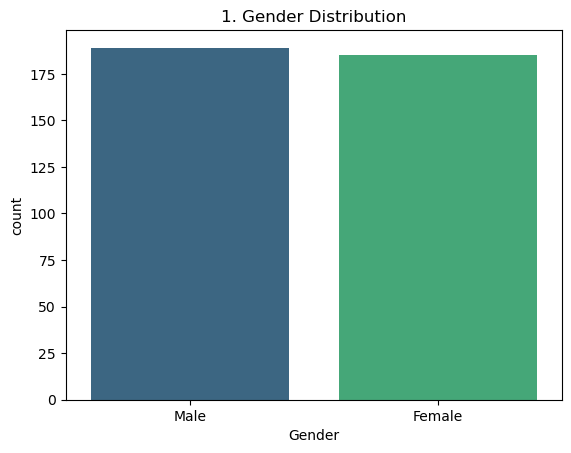

In [81]:
# 1. Gender Distribution (Categorical)
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('1. Gender Distribution')

Text(0.5, 1.0, '2. Age Distribution')

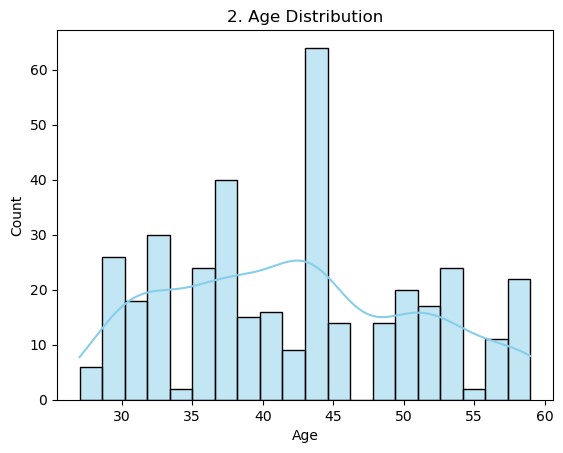

In [82]:
# 2. Age Distribution (Numerical)
sns.histplot(x='Age', data=df, kde=True, bins=20, color='skyblue')
plt.title('2. Age Distribution')

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\4080840372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df, order=occupation_order, palette='mako')


Text(0.5, 1.0, '3. Occupation Frequencies')

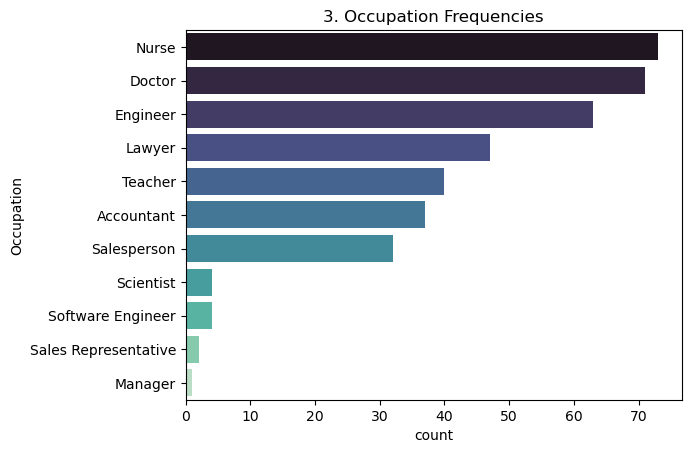

In [83]:
# 3. Occupation Distribution (Categorical - Sorted)
occupation_order = df['Occupation'].value_counts().index
sns.countplot(y='Occupation', data=df, order=occupation_order, palette='mako')
plt.title('3. Occupation Frequencies')

Text(0.5, 1.0, '4. Sleep Duration Distribution')

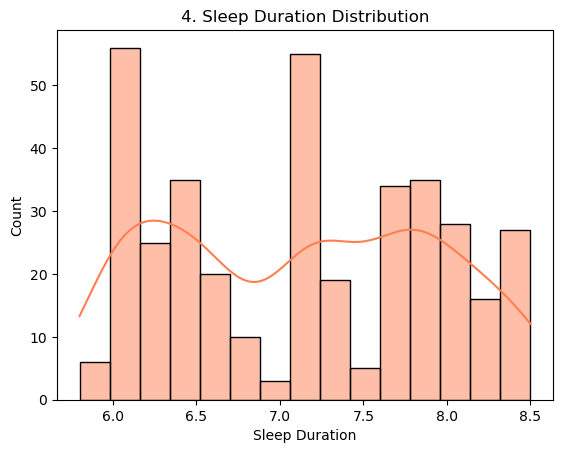

In [84]:
# 4. Sleep Duration Distribution (Numerical)
sns.histplot(x='Sleep Duration', data=df, kde=True, bins=15, color='coral')
plt.title('4. Sleep Duration Distribution')

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\1026303034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality of Sleep', data=df, palette='plasma')


Text(0.5, 1.0, '5. Quality of Sleep Scores')

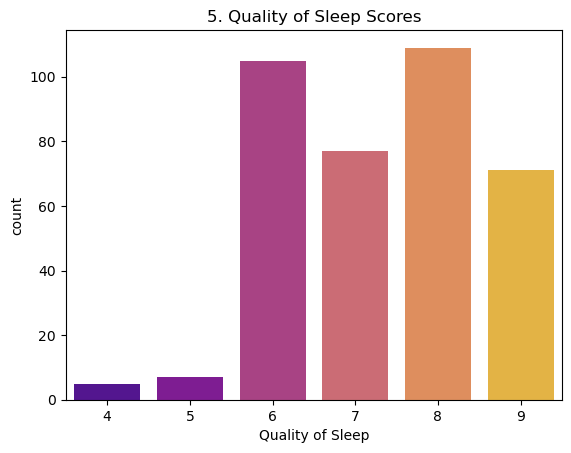

In [85]:
# 5. Quality of Sleep Distribution (Categorical/Ordinal)
sns.countplot(x='Quality of Sleep', data=df, palette='plasma')
plt.title('5. Quality of Sleep Scores')

Text(0.5, 1.0, '6. Physical Activity Level')

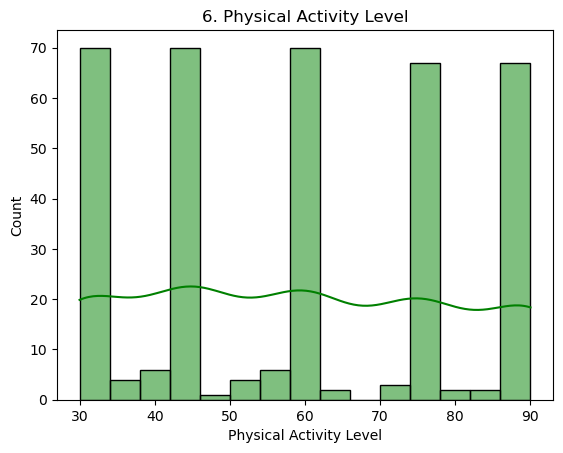

In [86]:
# 6. Physical Activity Level Distribution (Numerical)
sns.histplot(x='Physical Activity Level', data=df, kde=True, bins=15, color='green')
plt.title('6. Physical Activity Level')

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\2114756196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress Level', data=df, palette='magma')


Text(0.5, 1.0, '7. Stress Level Scores')

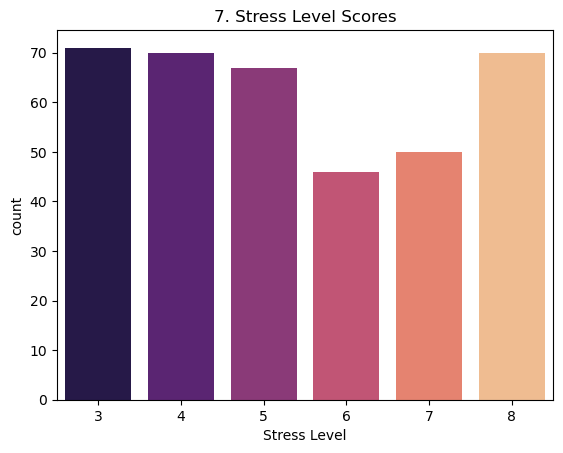

In [87]:
# 7. Stress Level Distribution (Categorical/Ordinal)
sns.countplot(x='Stress Level', data=df, palette='magma')
plt.title('7. Stress Level Scores')

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\1992140438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI Category', data=df, order=bmi_order, palette='Set3')


Text(0.5, 1.0, '8. BMI Category Frequencies')

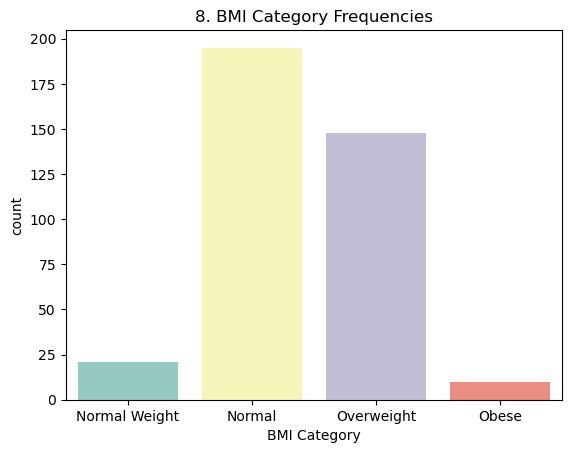

In [88]:
# 8. BMI Category Distribution (Categorical - Custom Order)
bmi_order = ['Normal Weight', 'Normal', 'Overweight', 'Obese']
sns.countplot(x='BMI Category', data=df, order=bmi_order, palette='Set3')
plt.title('8. BMI Category Frequencies')

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\662170993.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Pressure (Max)', data=df, palette='magma')


Text(0.5, 1.0, '9. Blood Pressure (Max)')

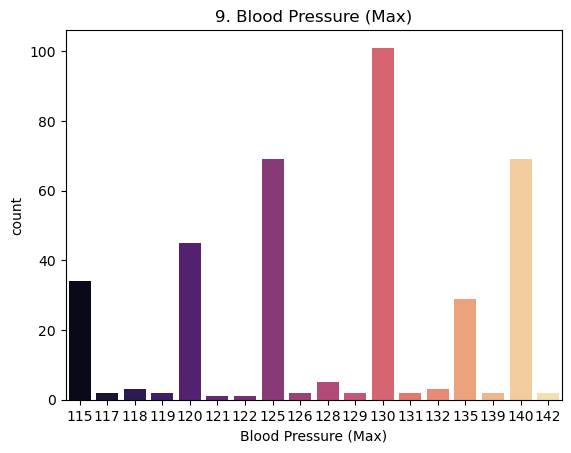

In [92]:
sns.countplot(x='Blood Pressure (Max)', data=df, palette='magma')
plt.title('9. Blood Pressure (Max)')

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\1950326871.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Pressure (Min)', data=df, palette='Set3')


Text(0.5, 1.0, '10. Blood Pressure (Min)')

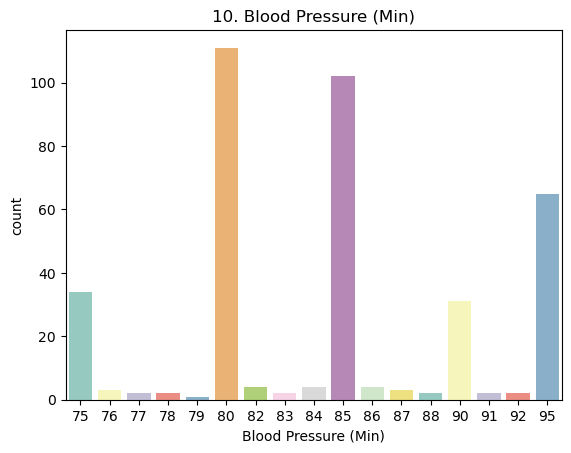

In [93]:
sns.countplot(x='Blood Pressure (Min)', data=df, palette='Set3')
plt.title('10. Blood Pressure (Min)')

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\1464439124.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='Gender', data=df, palette='viridis')
C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\1464439124.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2], y='Occupation', data=df, order=occupation_order, palette='mako')
C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\1464439124.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[4], x='Quality of Sleep', data=df, palette='plasma')
C:\User

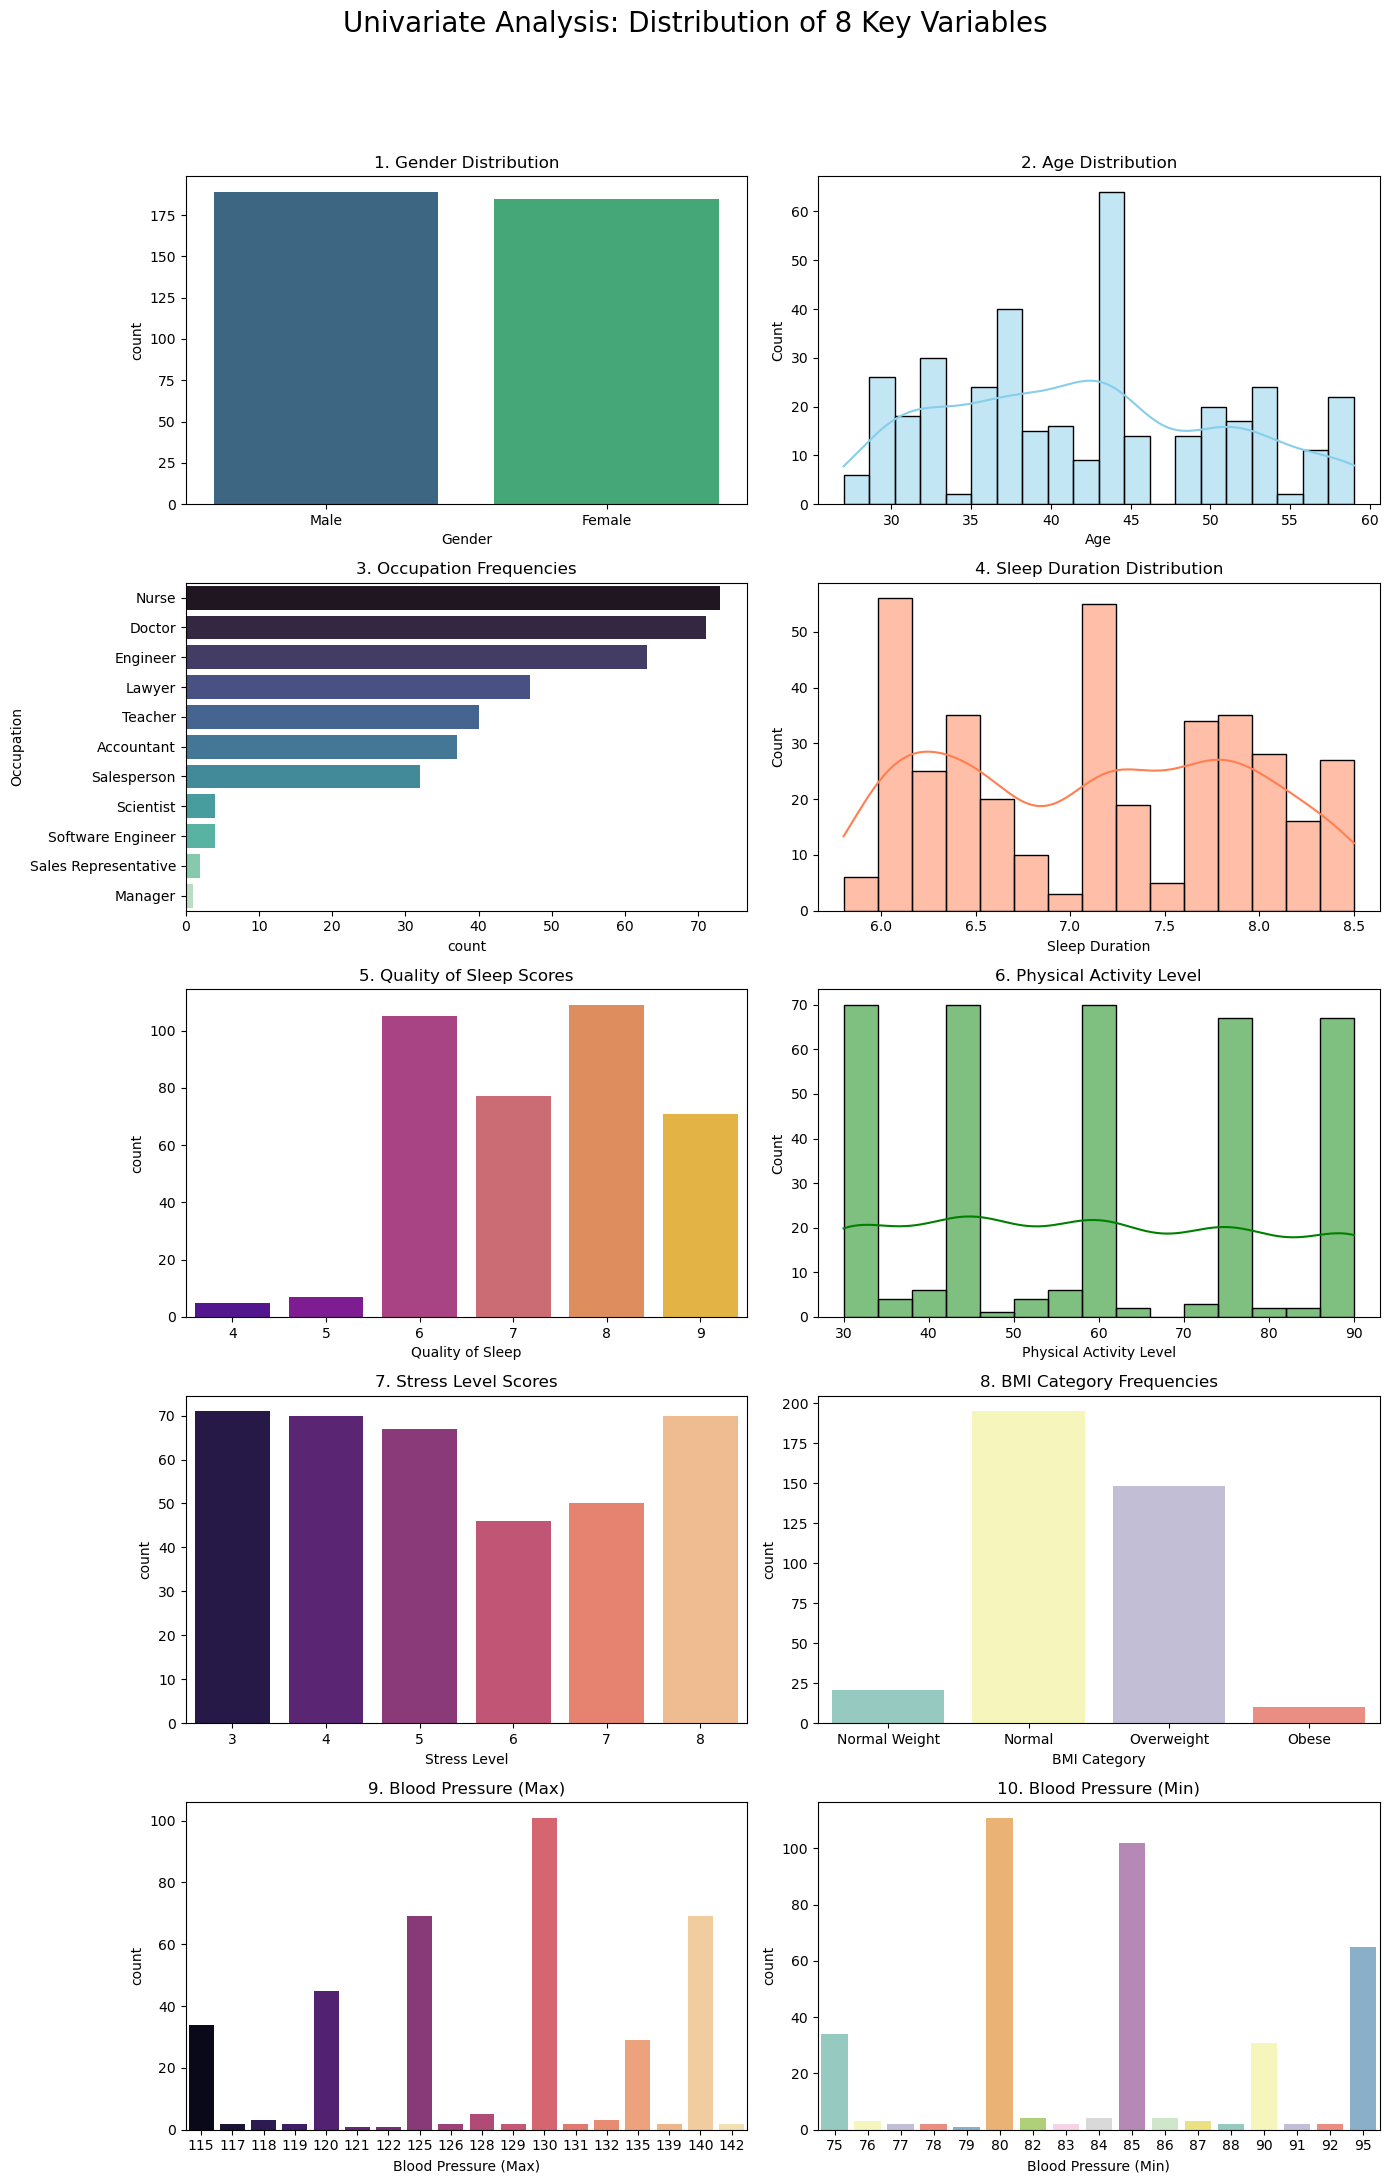

In [96]:
# Combine Graphs:

fig, axes = plt.subplots(5, 2, figsize=(14, 22))
fig.suptitle('Univariate Analysis: Distribution of 8 Key Variables', fontsize=20, y=1.02)
axes = axes.flatten() # Flatten the 2D array of axes for easy indexing

# 1. Gender Distribution (Categorical)
sns.countplot(ax=axes[0], x='Gender', data=df, palette='viridis')
axes[0].set_title('1. Gender Distribution')

# 2. Age Distribution (Numerical)
sns.histplot(ax=axes[1], x='Age', data=df, kde=True, bins=20, color='skyblue')
axes[1].set_title('2. Age Distribution')

# 3. Occupation Distribution (Categorical - Sorted)
occupation_order = df['Occupation'].value_counts().index
sns.countplot(ax=axes[2], y='Occupation', data=df, order=occupation_order, palette='mako')
axes[2].set_title('3. Occupation Frequencies')

# 4. Sleep Duration Distribution (Numerical)
sns.histplot(ax=axes[3], x='Sleep Duration', data=df, kde=True, bins=15, color='coral')
axes[3].set_title('4. Sleep Duration Distribution')

# 5. Quality of Sleep Distribution (Categorical/Ordinal)
sns.countplot(ax=axes[4], x='Quality of Sleep', data=df, palette='plasma')
axes[4].set_title('5. Quality of Sleep Scores')

# 6. Physical Activity Level Distribution (Numerical)
sns.histplot(ax=axes[5], x='Physical Activity Level', data=df, kde=True, bins=15, color='green')
axes[5].set_title('6. Physical Activity Level')

# 7. Stress Level Distribution (Categorical/Ordinal)
sns.countplot(ax=axes[6], x='Stress Level', data=df, palette='magma')
axes[6].set_title('7. Stress Level Scores')

# 8. BMI Category Distribution (Categorical - Custom Order)
bmi_order = ['Normal Weight', 'Normal', 'Overweight', 'Obese']
sns.countplot(ax=axes[7], x='BMI Category', data=df, order=bmi_order, palette='Set3')
axes[7].set_title('8. BMI Category Frequencies')

sns.countplot(ax=axes[8], x='Blood Pressure (Max)', data=df, palette='magma')
axes[8].set_title('9. Blood Pressure (Max)')

sns.countplot(ax=axes[9], x='Blood Pressure (Min)', data=df, palette='Set3')
axes[9].set_title('10. Blood Pressure (Min)')


plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.savefig('univariate_8_plots.png')
plt.show() 

---

In [90]:
# ===================================================================================================================
#                                                  II. Bivariate Analysis                                           #
# ===================================================================================================================

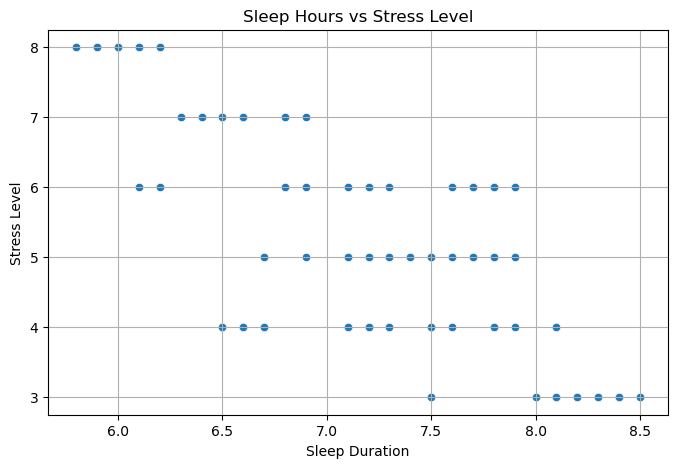

In [100]:
# 1. Sleep Hours vs Stress Level (Scatter)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sleep Duration", y="Stress Level", color="#1f77b4")
plt.title("Sleep Hours vs Stress Level")
plt.grid()
plt.show()

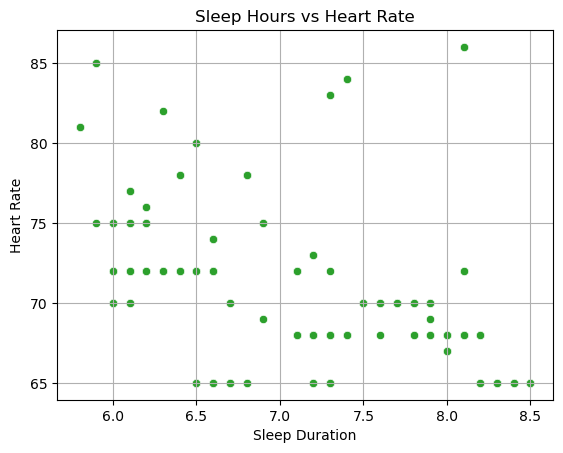

In [107]:
# plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sleep Duration", y="Heart Rate", color="#2ca02c")
plt.title("Sleep Hours vs Heart Rate")
plt.grid()
plt.show()

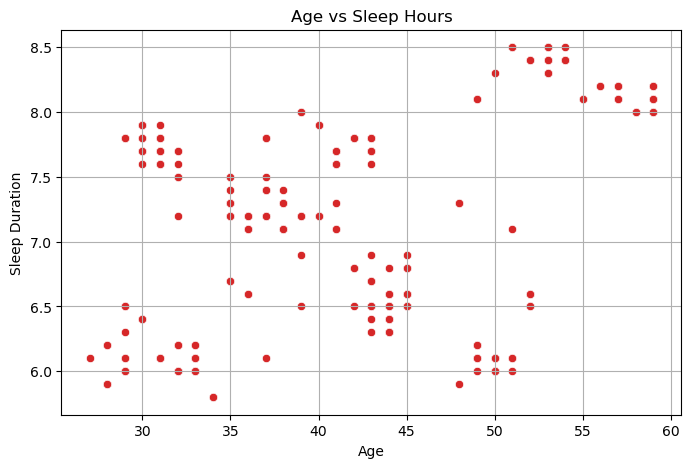

In [108]:
# 4. Age vs Sleep Hours (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="Sleep Duration", color="#d62728")
plt.title("Age vs Sleep Hours")
plt.grid()
plt.show()

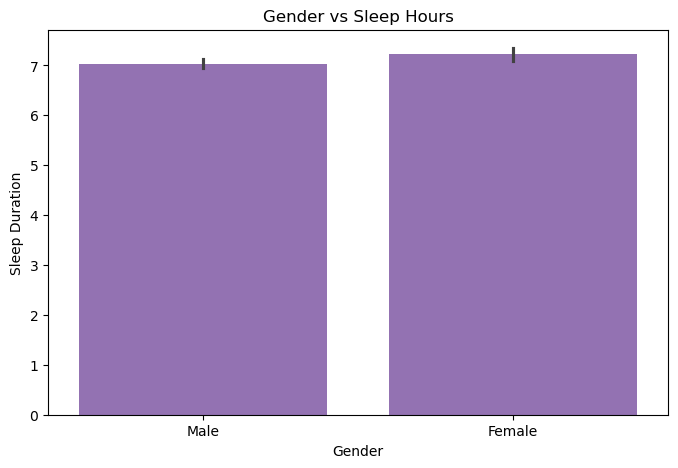

In [109]:
# 5. Gender vs Sleep Hours (Barplot)
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Gender", y="Sleep Duration", color="#9467bd")
plt.title("Gender vs Sleep Hours")
plt.show()

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\2761464628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Duration", palette=["#8c564b"])
C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\2761464628.py:3: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Duration", palette=["#8c564b"])


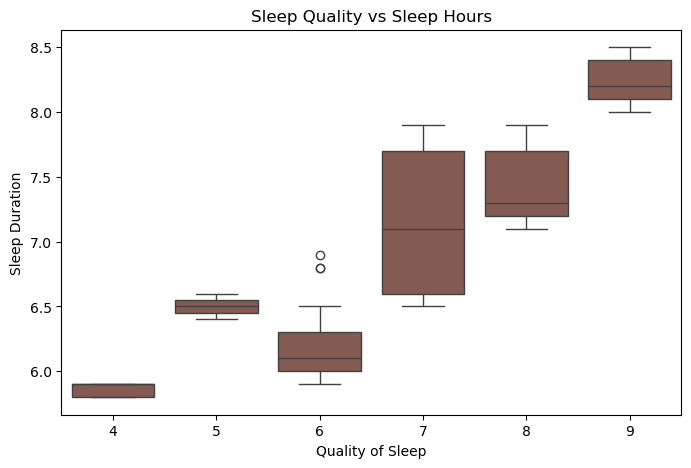

In [112]:
# 6. Sleep Quality vs Sleep Hours (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Duration", palette=["#8c564b"])
plt.title("Sleep Quality vs Sleep Hours")
plt.show()

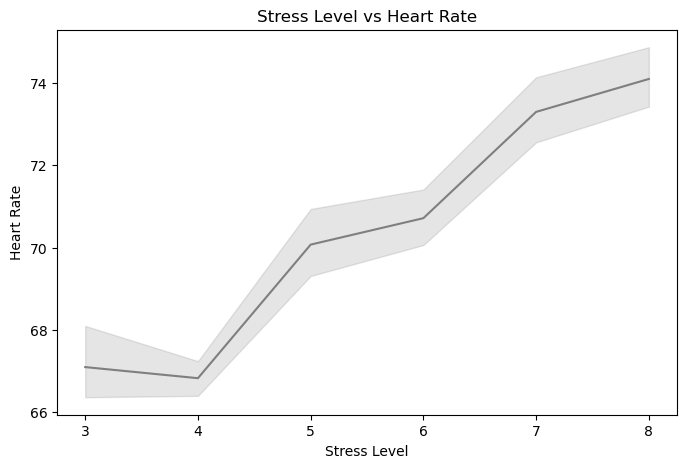

In [113]:
# 9. Stress Level vs Heart Rate (Line Plot)
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="Stress Level", y="Heart Rate", color="#7f7f7f")
plt.title("Stress Level vs Heart Rate")
plt.show()

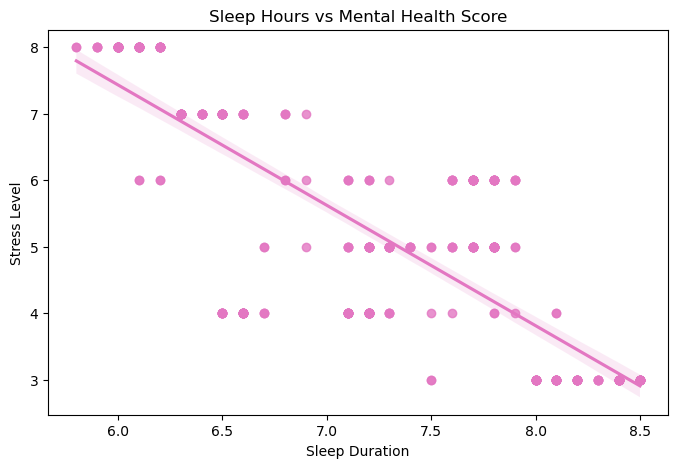

In [115]:
# 10. Sleep Hours vs Mental Health Score (Regplot)
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="Sleep Duration", y="Stress Level", color="#e377c2")
plt.title("Sleep Hours vs Mental Health Score")
plt.show()

---

In [116]:
# ===================================================================================================================
#                                               III. Multivariate Analysis                                          #
# ===================================================================================================================

In [127]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure (Max),Blood Pressure (Min)
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


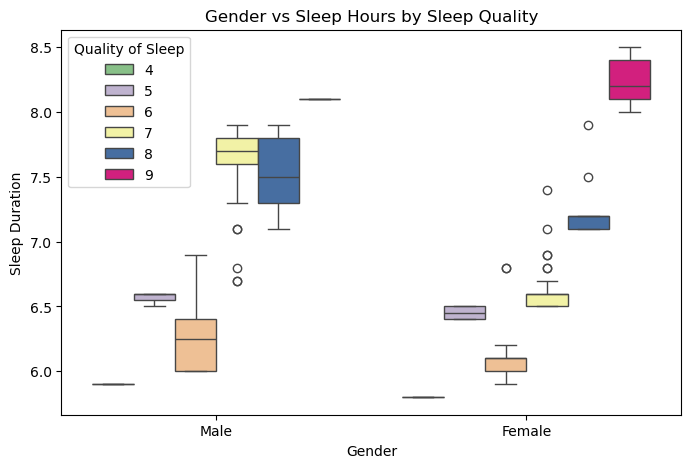

In [130]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Gender",
    y="Sleep Duration",
    hue="Quality of Sleep",
    palette="Accent"
)
plt.title("Gender vs Sleep Hours by Sleep Quality")
plt.show()


In [ ]:
# ===================================================================================================================
#                                               Images For LinkedIn                                                 #
# ===================================================================================================================

In [137]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150 # Increase image resolution

# =============================================================
# --- IMPORTANT: Data Loading ---
# Replace 'Sleep_Health_and_Lifestyle_Dataset.csv' with your actual file name
# and ensure the file is in your current working directory.
# =============================================================
try:
    # Assuming your original dataset file name or path
    df = pd.read_csv('Sleep_Health_and_Lifestyle_Dataset.csv') 
    
    # --- Necessary Data Cleaning/Preparation (as per your notebook analysis) ---
    # Assuming you need to handle missing values and split blood pressure
    df.columns = df.columns.str.replace(' ', '_')
    df['Sleep_Disorder'] = df['Sleep_Disorder'].fillna('None')

    # Example for handling Blood Pressure split, if not done already
    if 'Systolic_BP' not in df.columns and 'Diastolic_BP' not in df.columns:
        df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(float)

    print("--- DataFrame 'df' loaded and prepped successfully. Image Generation Started ---")
    
except FileNotFoundError:
    print("ERROR: Data file not found. Please check the file name/path in pd.read_csv().")
    df = pd.DataFrame() # Prevents NameError for subsequent code

if not df.empty:
    # =============================================================
    # 1. Correlation Heatmap (Best Summary of Analysis)
    # =============================================================
    try:
        # Select key numerical columns
        numerical_cols = ['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'Heart_Rate', 'Daily_Steps']
        corr_matrix = df[numerical_cols].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('1. Correlation Heatmap of Sleep and Health Variables', fontsize=16)
        plt.tight_layout()
        plt.savefig('1_Correlation_Heatmap.png')
        plt.close()
        print("1. Correlation Heatmap saved as '1_Correlation_Heatmap.png'")
    except Exception as e:
        print(f"Error saving Plot 1: {e}")


    # =============================================================
    # 2. Sleep Duration vs Stress Level (Relationship between Stress and Sleep)
    # =============================================================
    try:
        plt.figure(figsize=(8, 5))
        sns.regplot(x='Stress_Level', y='Sleep_Duration', data=df,
                    scatter_kws={'alpha':0.5, 'color':'blue'},
                    line_kws={'color':'red', 'linewidth': 2})
        plt.title('2. Relationship between Stress Level and Sleep Duration', fontsize=16)
        plt.xlabel('Stress Level (Scale: 1-10)')
        plt.ylabel('Sleep Duration (Hours)')
        plt.tight_layout()
        plt.savefig('2_SleepDuration_vs_Stress.png')
        plt.close()
        print("2. Regression Plot saved as '2_SleepDuration_vs_Stress.png'")
    except Exception as e:
        print(f"Error saving Plot 2: {e}")


    # =============================================================
    # 3. Quality of Sleep by Occupation (Impact of Profession on Sleep Quality)
    # =============================================================
    try:
        plt.figure(figsize=(12, 6))
        # Sort by Quality of Sleep (mean or median) for better visualization order
        order = df.groupby('Occupation')['Quality_of_Sleep'].median().sort_values(ascending=False).index
        sns.boxplot(x='Occupation', y='Quality_of_Sleep', data=df, order=order, palette='viridis')
        plt.title('3. Quality of Sleep Distribution by Occupation', fontsize=16)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Quality of Sleep (Scale: 1-10)')
        plt.xlabel('Occupation')
        plt.tight_layout()
        plt.savefig('3_QualityOfSleep_by_Occupation.png')
        plt.close()
        print("3. Box Plot saved as '3_QualityOfSleep_by_Occupation.png'")
    except Exception as e:
        print(f"Error saving Plot 3: {e}")


    # =============================================================
    # 4. Sleep Disorder by BMI Category (Health and Sleep Disorder)
    # =============================================================
    try:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='BMI_Category', hue='Sleep_Disorder', data=df, palette='Set1',
                      order=df['BMI_Category'].value_counts().index)
        plt.title('4. Sleep Disorder Distribution by BMI Category', fontsize=16)
        plt.xlabel('BMI Category')
        plt.ylabel('Count of Individuals')
        plt.legend(title='Sleep Disorder')
        plt.tight_layout()
        plt.savefig('4_SleepDisorder_by_BMI.png')
        plt.close()
        print("4. Count Plot saved as '4_SleepDisorder_by_BMI.png'")
    except Exception as e:
        print(f"Error saving Plot 4: {e}")


    # =============================================================
    # 5. Distribution of Sleep Duration (Frequency of Sleep Duration)
    # =============================================================
    try:
        plt.figure(figsize=(7, 5))
        sns.histplot(df['Sleep_Duration'], kde=True, bins=15, color='skyblue')
        plt.axvline(df['Sleep_Duration'].mean(), color='red', linestyle='--', label=f'Mean: {df["Sleep_Duration"].mean():.2f}')
        plt.title('5. Distribution of Sleep Duration', fontsize=16)
        plt.xlabel('Sleep Duration (Hours)')
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.savefig('5_Distribution_SleepDuration.png')
        plt.close()
        print("5. Histogram saved as '5_Distribution_SleepDuration.png'")
    except Exception as e:
        print(f"Error saving Plot 5: {e}")

--- DataFrame 'df' loaded and prepped successfully. Image Generation Started ---
1. Correlation Heatmap saved as '1_Correlation_Heatmap.png'
2. Regression Plot saved as '2_SleepDuration_vs_Stress.png'


C:\Users\GAURAV\AppData\Local\Temp\ipykernel_31488\2587937488.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Quality_of_Sleep', data=df, order=order, palette='viridis')


3. Box Plot saved as '3_QualityOfSleep_by_Occupation.png'
4. Count Plot saved as '4_SleepDisorder_by_BMI.png'
5. Histogram saved as '5_Distribution_SleepDuration.png'


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Quality_of_Sleep         374 non-null    int64  
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress_Level             374 non-null    int64  
 8   BMI_Category             374 non-null    object 
 9   Blood_Pressure           374 non-null    object 
 10  Heart_Rate               374 non-null    int64  
 11  Daily_Steps              374 non-null    int64  
 12  Sleep_Disorder           374 non-null    object 
 13  Systolic_BP              374 non-null    float64
 14  Diastolic_BP             3